In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Data exploration
    - Load data
    - Check shape
    - Identify any missing values
    - Check for any duplicate values
    - Identify data types for each column
    - Gather statistical summary
    - Generate visualizations

In [4]:
df = pd.read_csv('../datasets/cloud_data_usage_2025-Jun-27-16:25:00.csv')

In [3]:
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   instance_type            10000 non-null  object 
 1   region                   10000 non-null  object 
 2   cpu_utilization_percent  10000 non-null  float64
 3   memory_usage_percent     10000 non-null  float64
 4   storage_gb               10000 non-null  float64
 5   network_gb               10000 non-null  float64
 6   usage_hours              10000 non-null  float64
 7   month                    10000 non-null  int64  
 8   is_business_hours        10000 non-null  bool   
 9   total_cost               10000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 713.0+ KB


In [5]:
df

,instance_type,region,cpu_utilization_percent,memory_usage_percent,storage_gb,network_gb,usage_hours,month,is_business_hours,total_cost
0,t3.small,us-east-1,59.93,57.86,131.67,45.65,33.92,4,True,23.47
1,t3.medium,us-east-1,70.21,61.50,20.26,18.14,148.79,9,True,12.74
2,c5.xlarge,us-east-1,35.50,27.07,94.64,7.51,674.60,4,True,138.09
3,r5.xlarge,us-east-1,79.31,75.93,22.27,36.10,179.50,12,False,59.57
4,m5.large,ap-southeast-1,39.69,30.69,10.28,57.64,116.02,1,True,30.86
...,...,...,...,...,...,...,...,...,...,...
9995,t3.small,ap-southeast-1,38.30,38.74,10.00,5.13,220.83,6,False,7.51
9996,m5.large,us-west-2,14.42,29.65,175.27,220.76,270.22,1,False,88.37
9997,m5.large,ap-southeast-1,26.62,23.74,10.00,108.69,118.36,3,False,35.76
9998,m5.xlarge,ap-southeast-1,83.30,88.40,10.00,69.75,744.00,10,False,187.07


In [5]:
df.isnull().sum()

instance_type              0
region                     0
cpu_utilization_percent    0
memory_usage_percent       0
storage_gb                 0
network_gb                 0
usage_hours                0
month                      0
is_business_hours          0
total_cost                 0
dtype: int64

In [6]:
df.describe()

,cpu_utilization_percent,memory_usage_percent,storage_gb,network_gb,usage_hours,month,total_cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.160001,53.824581,100.722112,49.278793,349.006039,6.519900,67.012235
std,20.680207,22.926714,98.877833,48.799589,280.104607,3.459075,59.215448
min,5.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.380000
25%,39.500000,36.730000,28.457500,14.550000,90.005000,4.000000,24.947500
50%,54.260000,54.260000,69.895000,34.110000,250.175000,7.000000,45.000000
75%,68.810000,71.742500,139.895000,68.722500,685.335000,10.000000,90.987500
max,95.000000,90.000000,922.020000,447.960000,744.000000,12.000000,335.670000


In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.corr

<bound method DataFrame.corr of      instance_type          region  cpu_utilization_percent  \
0         t3.small       us-east-1                    59.93   
1        t3.medium       us-east-1                    70.21   
2        c5.xlarge       us-east-1                    35.50   
3        r5.xlarge       us-east-1                    79.31   
4         m5.large  ap-southeast-1                    39.69   
...            ...             ...                      ...   
9995      t3.small  ap-southeast-1                    38.30   
9996      m5.large       us-west-2                    14.42   
9997      m5.large  ap-southeast-1                    26.62   
9998     m5.xlarge  ap-southeast-1                    83.30   
9999      m5.large       us-east-1                    35.05   

      memory_usage_percent  storage_gb  network_gb  usage_hours  month  \
0                    57.86      131.67       45.65        33.92      4   
1                    61.50       20.26       18.14       148.79

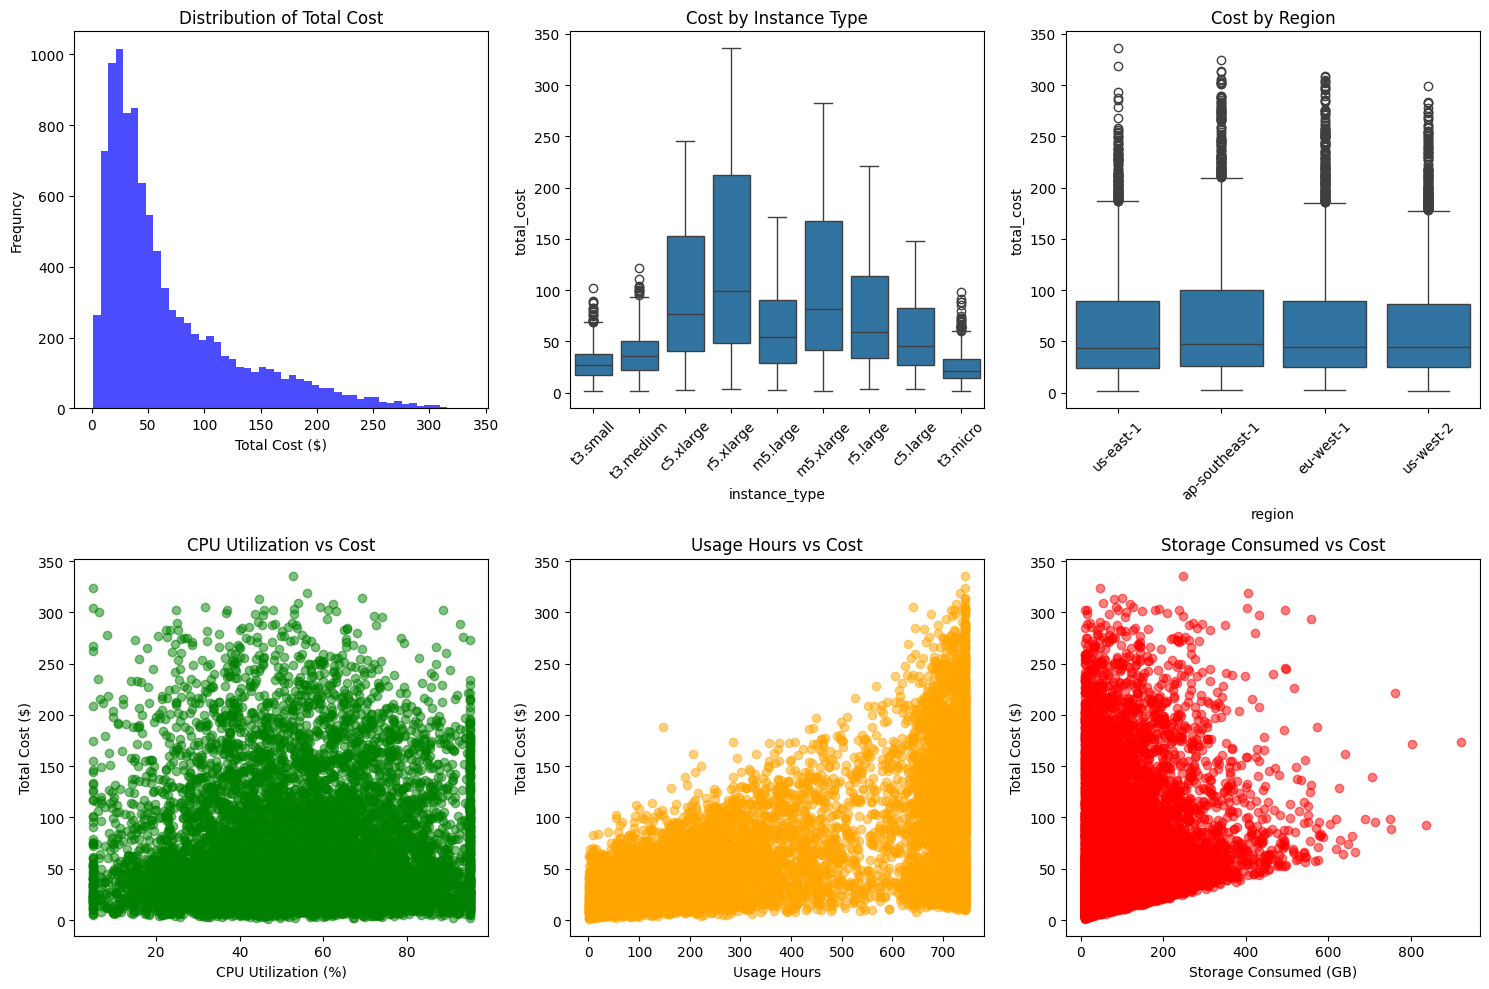

In [15]:
plt.figure(figsize=(15, 10))

# Plot with 2 rows, 3 columns 

# Cost distribution
plt.subplot(2, 3, 1)
plt.hist(df['total_cost'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost ($)')
plt.ylabel('Frequncy')

# Cost by instance type
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='instance_type', y='total_cost')
plt.xticks(rotation=45) # rotate the x axis to 45 degrees since instance names will be long
plt.title('Cost by Instance Type')

# Cost by region
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='region', y='total_cost')
plt.xticks(rotation=45) # rotate the x axis to 45 degrees since region names will be long
plt.title('Cost by Region')

# CPU utilization vs cost
plt.subplot(2, 3, 4)
plt.scatter(df['cpu_utilization_percent'], df['total_cost'], alpha=0.5, color='green')
plt.xlabel('CPU Utilization (%)')
plt.ylabel('Total Cost ($)')
plt.title('CPU Utilization vs Cost')

# Usage hours vs cost
plt.subplot(2, 3, 5)
plt.scatter(df['usage_hours'], df['total_cost'], alpha=0.5, color='orange')
plt.xlabel('Usage Hours')
plt.ylabel('Total Cost ($)')
plt.title('Usage Hours vs Cost')

# Storage vs cost
plt.subplot(2, 3, 6)
plt.scatter(df['storage_gb'], df['total_cost'], alpha=0.5, color='red')
plt.xlabel('Storage Consumed (GB)')
plt.ylabel('Total Cost ($)')
plt.title('Storage Consumed vs Cost')

plt.tight_layout()
plt.show()

# Correlation Analysis

In [11]:
df_encoded = df.copy()
le_instance = LabelEncoder()
le_region = LabelEncoder()

In [13]:
# Encode instance types into numerical values
df_encoded['instance_type_encoded'] = le_instance.fit_transform(df['instance_type'])

# Encode region names into numeric values
df_encoded['region_encoded'] = le_region.fit_transform(df['region'])

# Encode bool value for is_business_hours into numeric values
df_encoded['is_business_hours_encoded'] = df['is_business_hours'].astype(int)

In [14]:
df_encoded

,instance_type,region,cpu_utilization_percent,memory_usage_percent,storage_gb,network_gb,usage_hours,month,is_business_hours,total_cost,instance_type_encoded,region_encoded,is_business_hours_encoded
0,t3.small,us-east-1,59.93,57.86,131.67,45.65,33.92,4,True,23.47,8,2,1
1,t3.medium,us-east-1,70.21,61.50,20.26,18.14,148.79,9,True,12.74,6,2,1
2,c5.xlarge,us-east-1,35.50,27.07,94.64,7.51,674.60,4,True,138.09,1,2,1
3,r5.xlarge,us-east-1,79.31,75.93,22.27,36.10,179.50,12,False,59.57,5,2,0
4,m5.large,ap-southeast-1,39.69,30.69,10.28,57.64,116.02,1,True,30.86,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,t3.small,ap-southeast-1,38.30,38.74,10.00,5.13,220.83,6,False,7.51,8,0,0
9996,m5.large,us-west-2,14.42,29.65,175.27,220.76,270.22,1,False,88.37,2,3,0
9997,m5.large,ap-southeast-1,26.62,23.74,10.00,108.69,118.36,3,False,35.76,2,0,0
9998,m5.xlarge,ap-southeast-1,83.30,88.40,10.00,69.75,744.00,10,False,187.07,3,0,0


In [17]:
#  Calculate correlations with price
numeric_cols = ['cpu_utilization_percent', 'memory_usage_percent', 'storage_gb', 'network_gb', 'usage_hours',
                'month', 'instance_type_encoded', 'region_encoded', 'is_business_hours_encoded']

correlations = df_encoded[numeric_cols + ['total_cost']].corr()['total_cost'].sort_values(ascending=False)

for col, corr in correlations.items():
    if col != 'total_cost':
        print(f"{col}: {corr:.3f}")

usage_hours: 0.635
storage_gb: 0.154
network_gb: 0.152
is_business_hours_encoded: 0.080
cpu_utilization_percent: 0.038
memory_usage_percent: 0.030
month: 0.022
region_encoded: -0.042
instance_type_encoded: -0.246
